# Solar Cell Experiment

In [1]:
from IPython.display import Image

## Modules to Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp
import pandas as pd
import seaborn as sns

## Working Formula

## Plots

### Voltage vs. $\frac{1}{d^2}$

In [3]:
data1 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot1')
display(data1.head())

,d in mm,1/d2 in 1/mm2,V in mV
0,800,0.000002,0.7
1,775,0.000002,0.8
2,750,0.000002,0.8
3,725,0.000002,0.9
4,700,0.000002,0.9


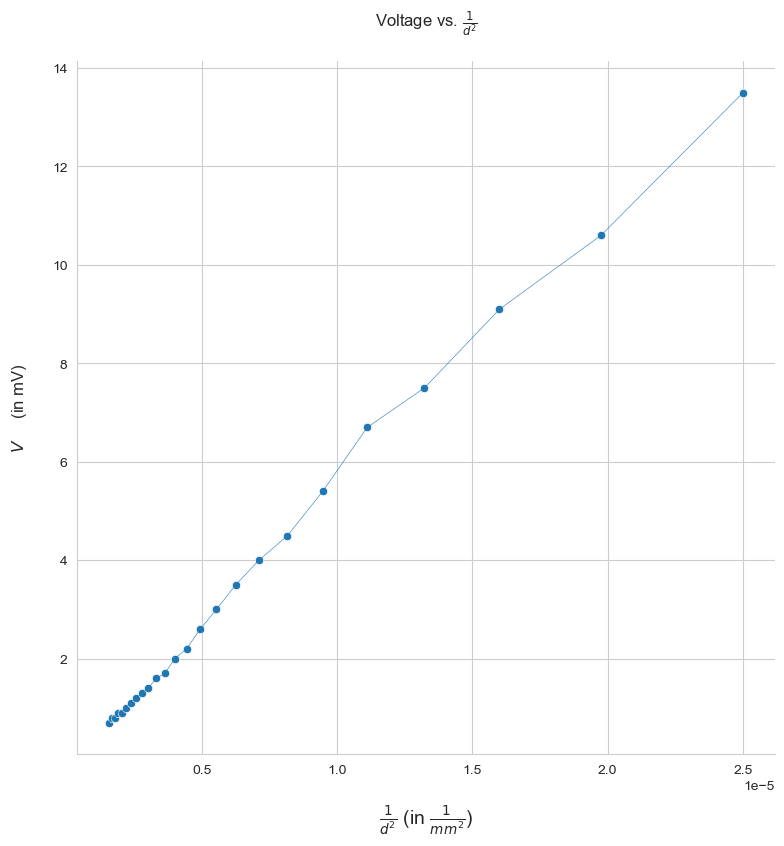

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
sns.lineplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1', linewidth=0.4)
sns.scatterplot(data=data1, x='1/d2 in 1/mm2', y='V in mV', palette='Set1')
sns.despine()
plt.title('Voltage vs. $\\frac{1}{d^2}$\n')
plt.xlabel('\n$\\frac{1}{d^2}$\t(in $\\frac{1}{mm^2}$)', fontsize=14)
plt.ylabel('$V$\t(in mV)\n', fontsize=12)
# plt.xlim(0,1)
# plt.xticks(np.arange(-0.5, 8, 0.5))
# plt.yticks(np.arange(-0.05, 0.9, 0.05))
plt.savefig('Voltage vs inv sq distance', dpi=300)
plt.show()

### Short circuit current vs. Open circuit voltage

In [5]:
data2 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot2')
display(data2.head())

,distance in mm,Vopen in V,Ishort in mA
0,500,2.03,68.0
1,600,1.98,47.2
2,700,1.92,32.6
3,800,1.87,23.6


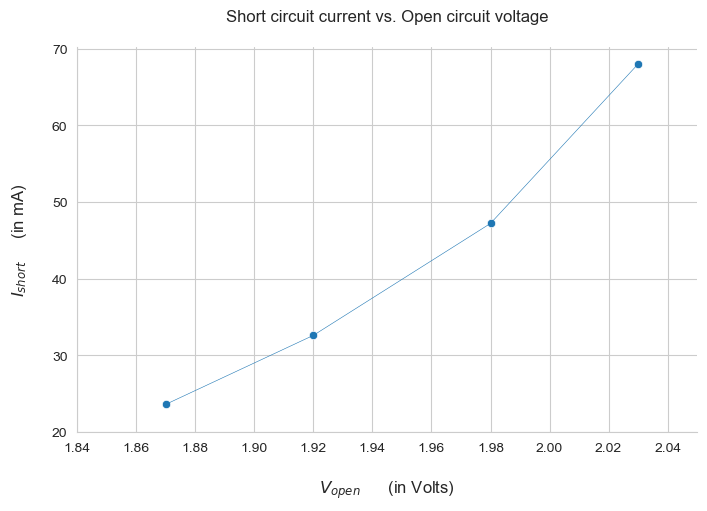

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
sns.lineplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1', linewidth=0.4)
sns.scatterplot(data=data2, x='Vopen in V', y='Ishort in mA', palette='Set1')
sns.despine()
plt.title('Short circuit current vs. Open circuit voltage\n')
plt.xlabel('\n$V_{open}$\t(in Volts)', fontsize=12)
plt.ylabel('$I_{short}$\t(in mA)\n', fontsize=12)
plt.xlim(1.84, 2.05)
plt.xticks(np.arange(1.84, 2.05, 0.02))
plt.yticks(np.arange(20, 71, 10))
plt.savefig('Short circuit current vs Open circuit voltage', dpi=200)
plt.show()

### I-V Characteristics with normal conditions

In [7]:
data3 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot3')
display(data3.head())

,distance in mm,V in V,I in mA
0,500,2.05,8.7
1,500,2.05,9.2
2,500,2.05,9.7
3,500,2.04,10.8
4,500,2.04,11.9


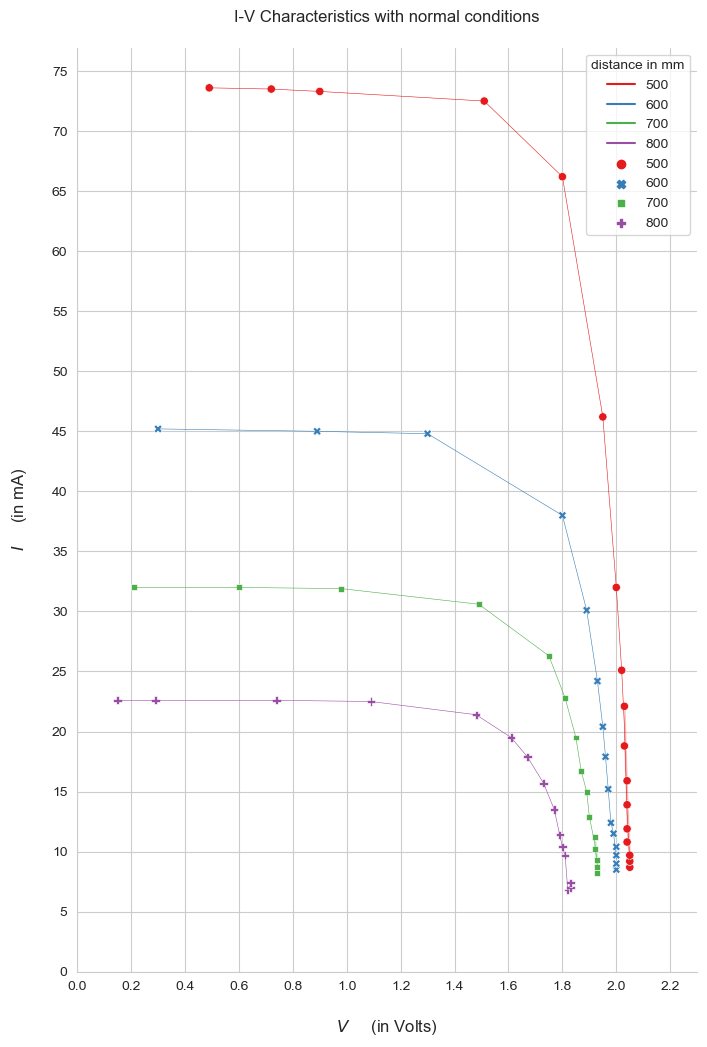

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
sns.lineplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
sns.scatterplot(data=data3, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with normal conditions\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0,2.3)
plt.xticks(np.arange(0, 2.3, 0.2))
plt.yticks(np.arange(0, 80, 5))
plt.savefig('I-V Characteristics with normal conditions', dpi=300)
plt.show()

### I-V Characteristics in a different temperature (using blower)

In [9]:
data4 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot4')
display(data4.head())

,distance in mm,V in V,I in mA
0,600,1.98,8.3
1,600,1.98,8.9
2,600,1.97,9.4
3,600,1.96,10.2
4,600,1.96,11.0


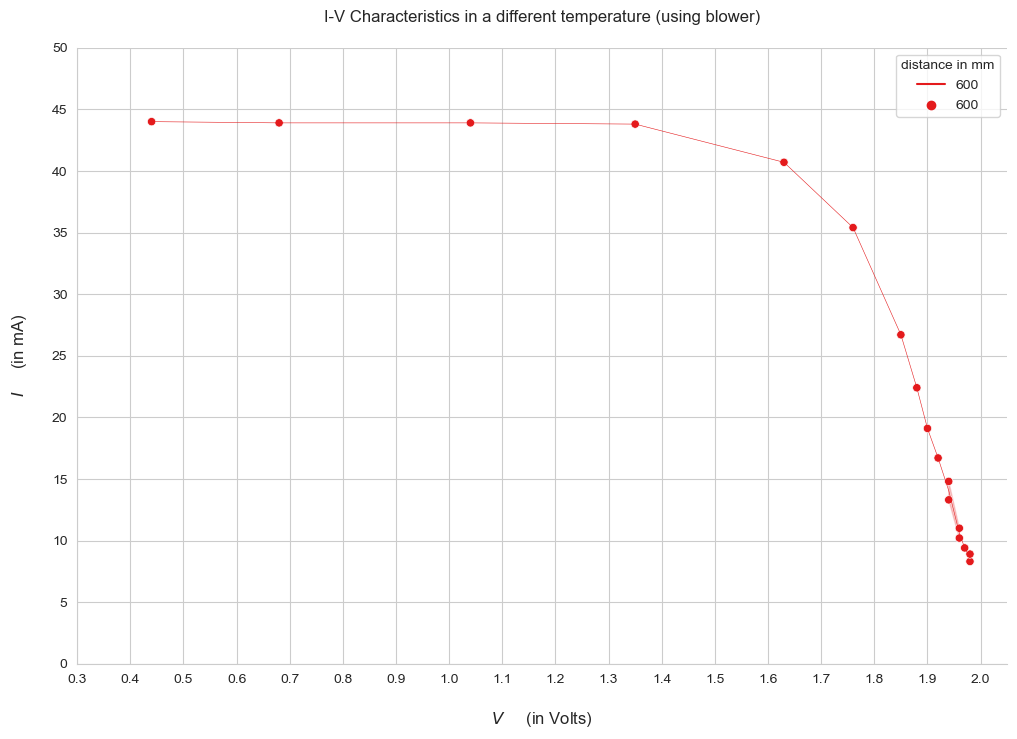

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
sns.scatterplot(data=data4, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics in a different temperature (using blower)\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.3,2.05)
plt.xticks(np.arange(0.3, 2.05, 0.1))
plt.yticks(np.arange(0, 51, 5))
plt.savefig('I-V Characteristics in a different temperature (using blower)', dpi=300)
plt.show()

### I-V Characteristics with glass absorber

In [11]:
data5 = pd.read_excel("PH 211 Solar Cell expt.xlsx", sheet_name='plot5')
display(data5.head())

,distance in mm,V in V,I in mA
0,600,1.95,6.3
1,600,1.94,7.2
2,600,1.94,7.8
3,600,1.93,8.9
4,600,1.93,9.7


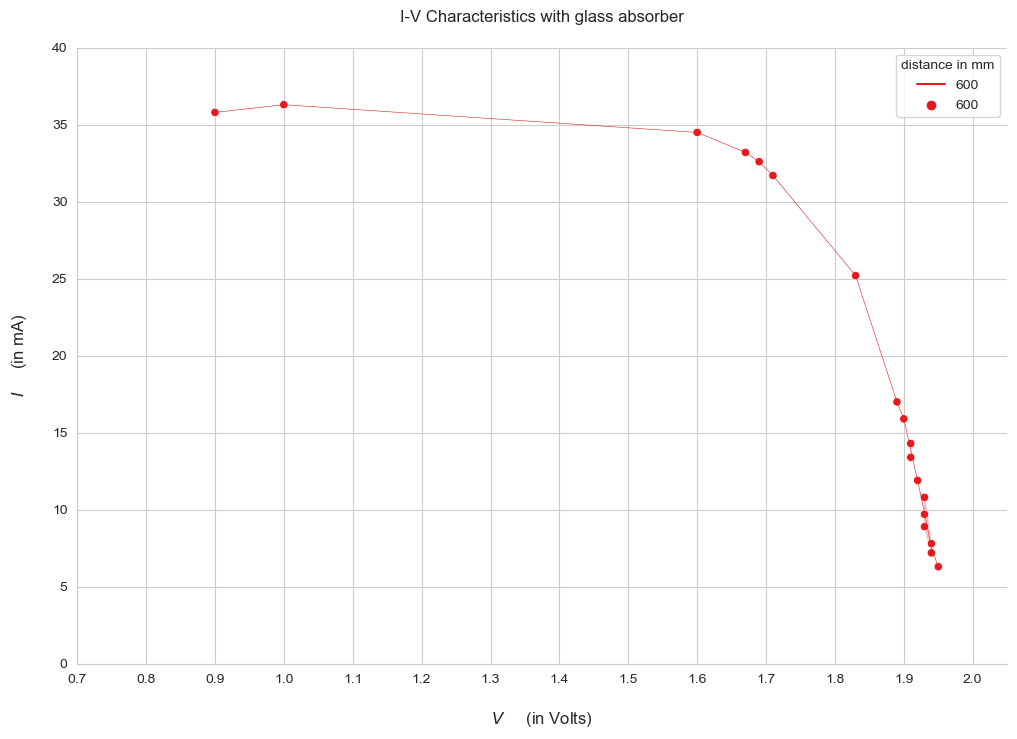

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.lineplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', palette='Set1', linewidth=0.4)
sns.scatterplot(data=data5, x='V in V', y='I in mA', hue='distance in mm', 
                style='distance in mm', palette='Set1')
sns.despine()
plt.title('I-V Characteristics with glass absorber\n')
plt.xlabel('\n$V$\t(in Volts)', fontsize=12)
plt.ylabel('$I$\t(in mA)\n', fontsize=12)
plt.xlim(0.7, 2.05)
plt.xticks(np.arange(0.7, 2.05, 0.1))
plt.yticks(np.arange(0, 41, 5))
plt.savefig('I-V Characteristics with glass absorber', dpi=300)
plt.show()